#### IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
from google.colab import drive
# drive.mount._DEBUG = True
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [23]:
# !ls /content/drive/MyDrive/4*csv

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [3]:
df_creditcard = pd.read_csv("/content/drive/MyDrive/4.+Marketing_data.csv")
df_creditcard

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## DATA FEATURES

#### CUSTID: Identification of Credit Card holder 
#### BALANCE: Balance amount left in customer's account to make purchases
#### BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
#### PURCHASES: Amount of purchases made from account
#### ONEOFFPURCHASES: Maximum purchase amount done in one-go
#### INSTALLMENTS_PURCHASES: Amount of purchase done in installment
#### CASH_ADVANCE: Cash in advance given by the user
#### PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#### ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
#### PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
#### CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
#### CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
#### PURCHASES_TRX: Number of purchase transactions made
#### CREDIT_LIMIT: Limit of Credit Card for user
#### PAYMENTS: Amount of Payment done by user
#### MINIMUM_PAYMENTS: Minimum amount of payments made by user  
#### PRC_FULL_PAYMENT: Percent of full payment paid by user
#### TENURE: Tenure of credit card service for user

In [4]:
display(df_creditcard.info())
display(df_creditcard.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Observations

##### Mean balance is $1564

##### Balance frequency is frequently updated on average ~0.9

##### Purchases average is $1000

##### one off purchase average is ~$600

##### Average purchases frequency is around 0.5

##### average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

##### Average credit limit ~ 4500

##### Percent of full payment is 15%

##### Average tenure is 11 years

### Check anomalous users/ outliers

In [5]:
display(df_creditcard[df_creditcard['PURCHASES']==49039.57])
display(df_creditcard[df_creditcard['CASH_ADVANCE']==47137.211760])


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#### C10574 with high one off purchase has a low cash advance frequency and usually uses installments. Target marketing towards installments and big purchases

#### C12226 with high cash advance also has a large cash advance transactions and doesn't pay in full. Target marketing towards cash advances

### Pre process data

#### Missing values

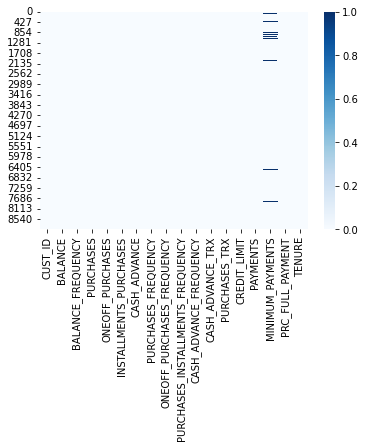

In [6]:
sns.heatmap(df_creditcard.isnull(),cmap='Blues')

In [7]:
df_creditcard.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df_creditcard.loc[df_creditcard['MINIMUM_PAYMENTS'].isnull(),'MINIMUM_PAYMENTS'] = df_creditcard['MINIMUM_PAYMENTS'].mean()

In [9]:
df_creditcard.loc[df_creditcard['CREDIT_LIMIT'].isnull(),'CREDIT_LIMIT'] = df_creditcard['CREDIT_LIMIT'].mean()

#### Duplicates

In [10]:
df_creditcard.duplicated().sum()

0

#### Drop Cust ID

In [11]:
df_creditcard.drop('CUST_ID',axis = 1, inplace=True)

In [12]:
df_creditcard.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualize Data

In [33]:
# pd.plotting.scatter_matrix(df_creditcard,figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)

In [13]:
df_creditcard.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

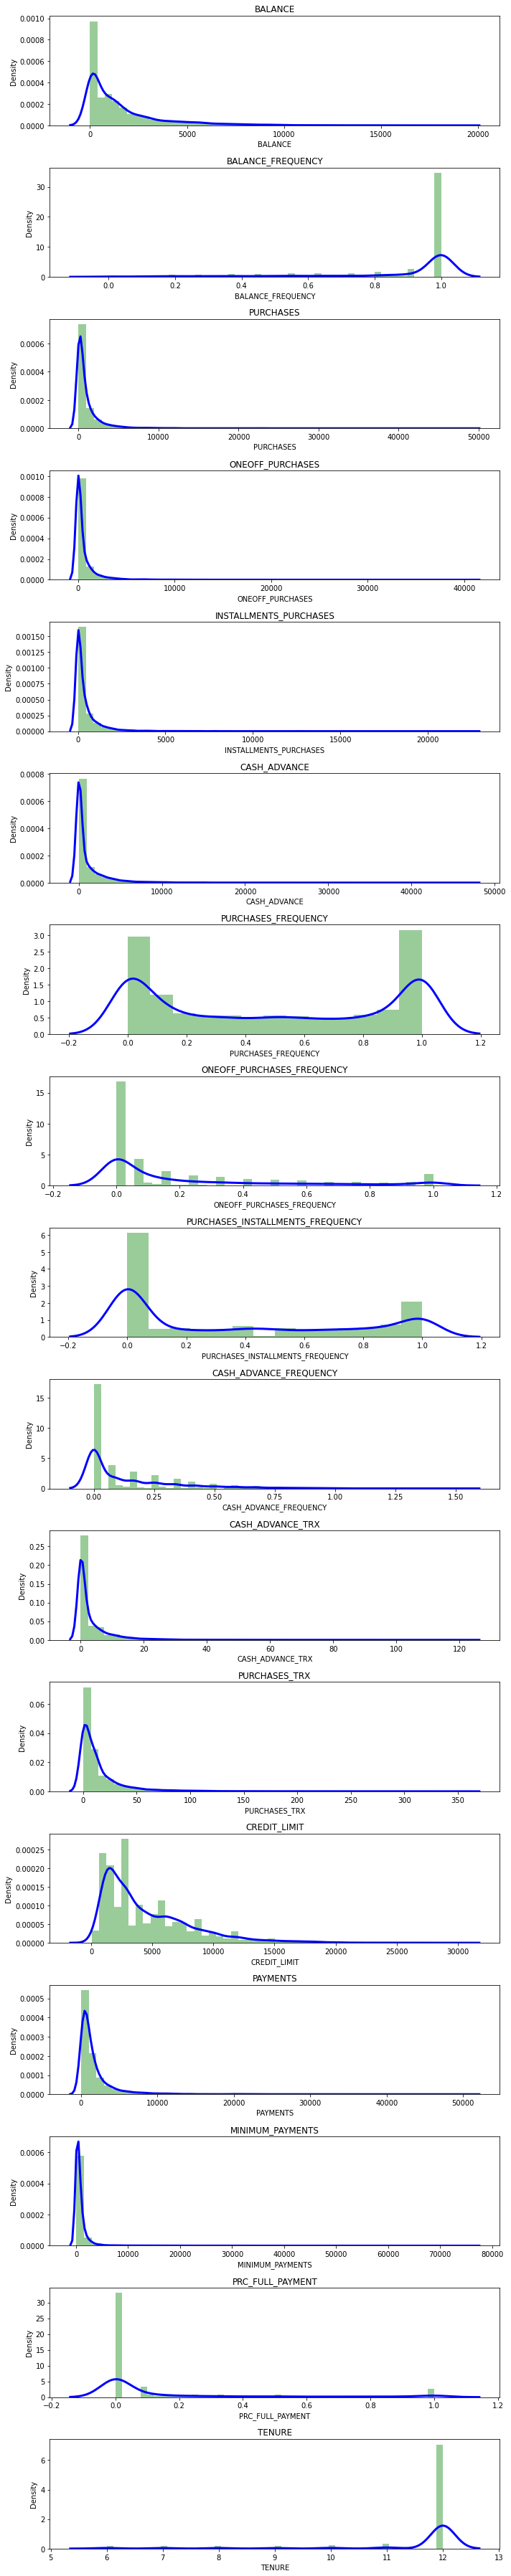

In [14]:
plt.figure(figsize=(10,50))
for i in range(len(df_creditcard.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df_creditcard[df_creditcard.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df_creditcard.columns[i])

plt.tight_layout()

### Observations

#### 'Balance_Frequency' for most customers is updated frequently ~1

#### For 'PURCHASES_FREQUENCY', there are two distinct group of customers

#### For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 

#### Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

#### Credit limit average is around $4500

#### Most customers are ~11 years tenure

### Correlations

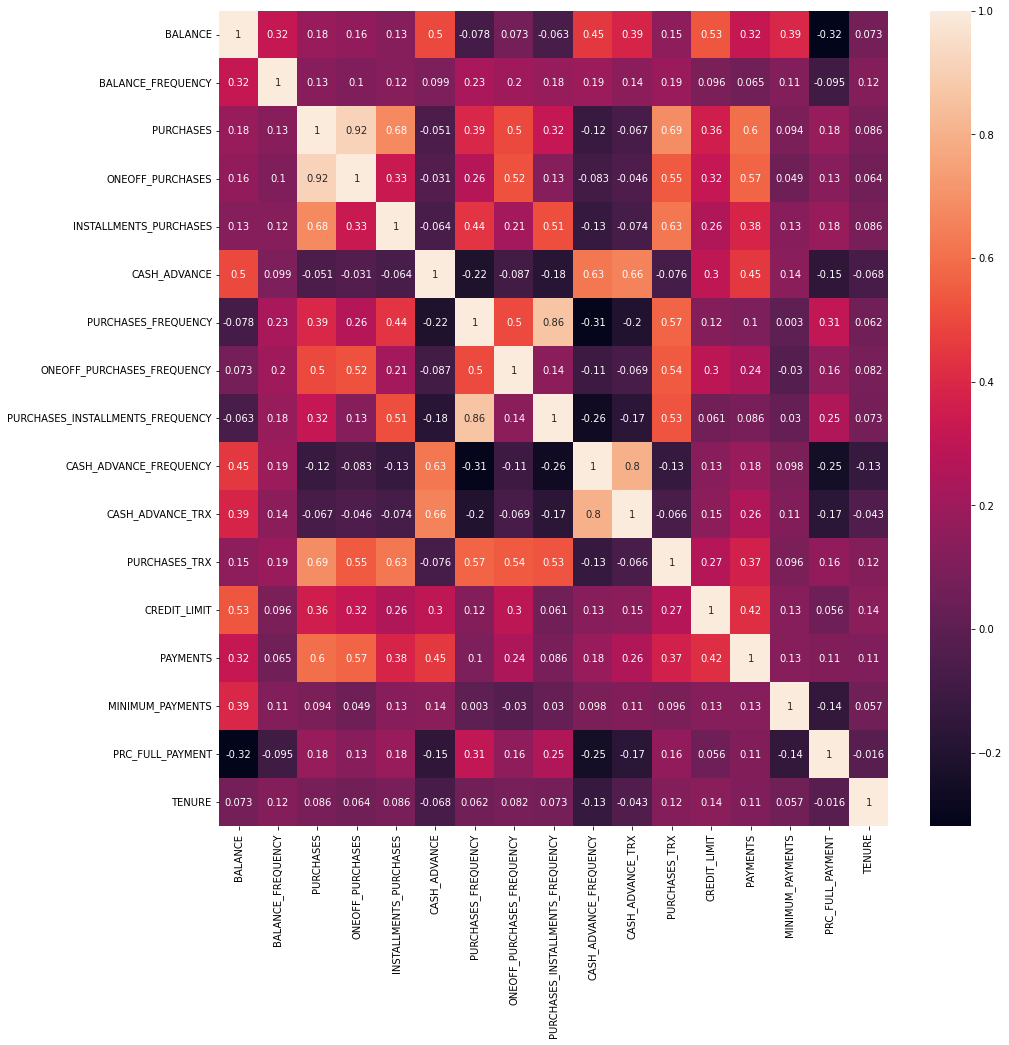

In [15]:
correlation = df_creditcard.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

#### 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 

#### Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


## Scale data

In [16]:
# Let's scale the data first

scaler = StandardScaler()
df_creditcard_scaled = scaler.fit_transform(df_creditcard)
df_creditcard_scaled.shape

(8950, 17)

In [17]:
df_creditcard_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## K MEANS CLUSTERING

#### Elbow method to find the required number of clusters

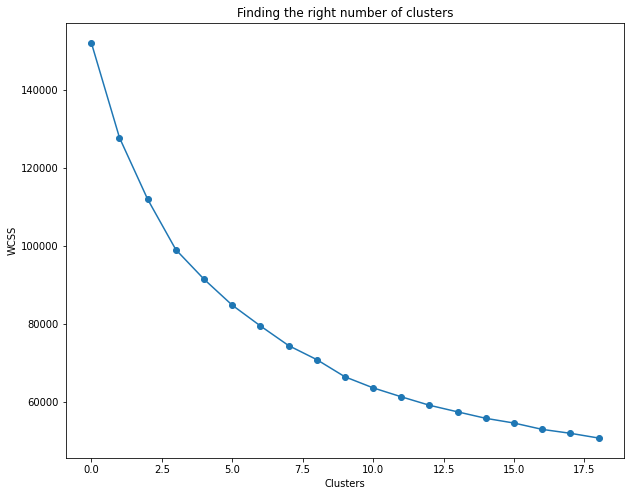

In [45]:

wcss = [KMeans(n_clusters=i).fit(df_creditcard_scaled).inertia_ for i in range(1,20)]

fig = plt.figure(figsize=(10,8))
plt.plot(wcss, 'o-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.show()

In [46]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b4c395290>,
                 estimator=KMeans(n_clusters=19), k=(1, 20))

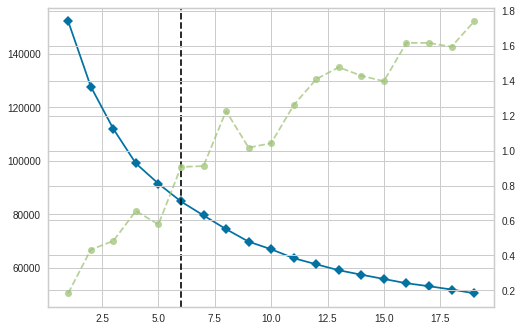

In [48]:
model = KElbowVisualizer(KMeans(),k=(1,20))
model.fit(df_creditcard_scaled)

In [49]:
# The elbow value is 
model.elbow_value_

6

#### Linear reduction happens after 6 clusters

In [63]:
kmeans = KMeans(7)
kmeans.fit(df_creditcard_scaled)

KMeans(n_clusters=7)

In [64]:
kmeans.labels_.max()

6

In [65]:
kmeans.cluster_centers_.shape

(7, 17)

In [66]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_creditcard.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
1,0.006191,0.403118,-0.343664,-0.225056,-0.399012,-0.105558,-0.808550,-0.335288,-0.751448,0.083207,-0.042443,-0.464095,-0.302592,-0.249221,-0.016125,-0.452920,0.272336
2,0.129051,0.429637,0.937473,0.894314,0.573622,-0.308271,1.092371,1.870667,0.535834,-0.408071,-0.318696,1.197057,0.700776,0.385944,-0.056529,0.454372,0.307767
3,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
4,-0.368361,0.330763,-0.039715,-0.235288,0.338184,-0.368187,0.982100,-0.359548,1.175957,-0.477922,-0.362377,0.173822,-0.277711,-0.221683,-0.015393,0.307719,0.251837
5,1.668800,0.396392,-0.206192,-0.150467,-0.211188,1.989904,-0.459018,-0.191707,-0.406858,1.909199,1.920628,-0.244655,1.007249,0.819113,0.552344,-0.394986,0.068135
6,-0.701770,-2.134285,-0.307190,-0.230859,-0.302103,-0.320430,-0.547889,-0.429265,-0.441194,-0.521456,-0.376613,-0.416524,-0.171336,-0.191903,-0.257353,0.299740,0.202307


In [67]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_creditcard.columns])
cluster_centers

# Index 6: First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($307), Percentage of full payment = 24%
# Index 5: Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (~$5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Index 1: Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Index 3: Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
1,1577.360456,0.972766,268.962006,218.890011,50.246126,757.511141,0.165840,0.102435,0.065793,0.151795,2.959184,3.174173,3393.496364,1011.673427,826.628694,0.021243,11.881773
2,1833.083251,0.979048,3006.129992,2076.815334,929.786727,332.413449,0.928772,0.760514,0.577391,0.053485,1.073958,44.464201,7044.159931,2850.414351,732.468820,0.286611,11.929190
3,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
4,797.763307,0.955625,918.353281,201.908308,716.883070,206.765482,0.884515,0.095197,0.831793,0.039507,0.775871,19.030407,3484.021678,1091.393649,828.332718,0.243717,11.854340
5,5037.940211,0.971172,562.671846,342.692852,220.092718,5151.791783,0.306124,0.145268,0.202741,0.517194,16.355705,8.628635,8159.233272,4104.395880,2151.420687,0.038188,11.608501
6,103.799318,0.371678,346.889134,209.258713,137.880042,306.914213,0.270456,0.074400,0.189096,0.030796,0.678722,4.356602,3871.059247,1177.604033,264.455315,0.241384,11.788057


In [72]:
labels = kmeans.labels_
labels.min()

0

In [69]:
# concatenate the clusters labels to our original dataframe

df_creditcard_cluster = pd.concat([df_creditcard, pd.DataFrame({'cluster':labels})], axis = 1)
df_creditcard_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


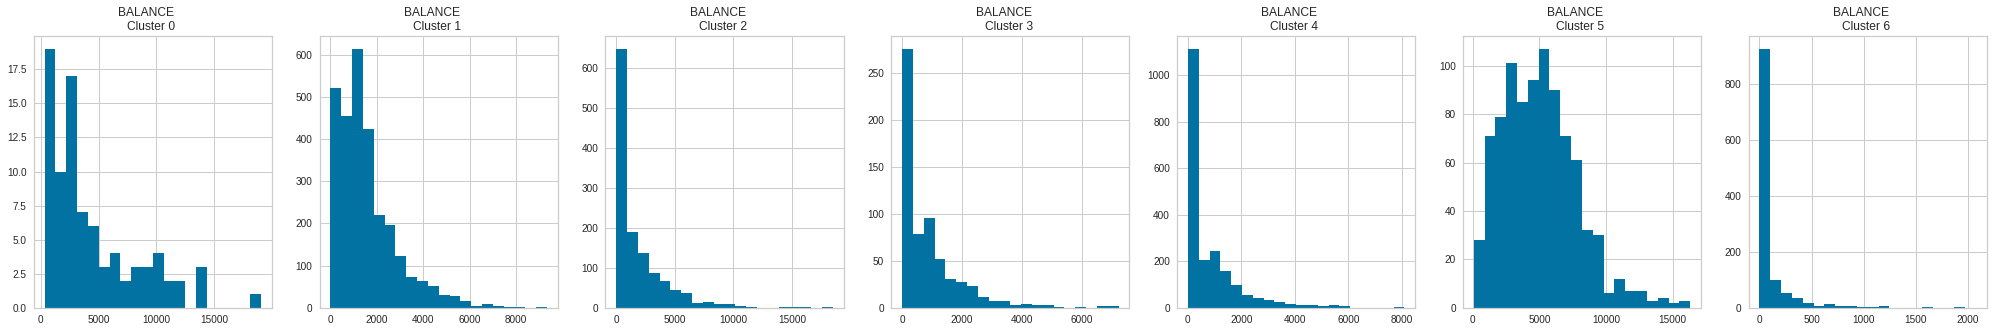

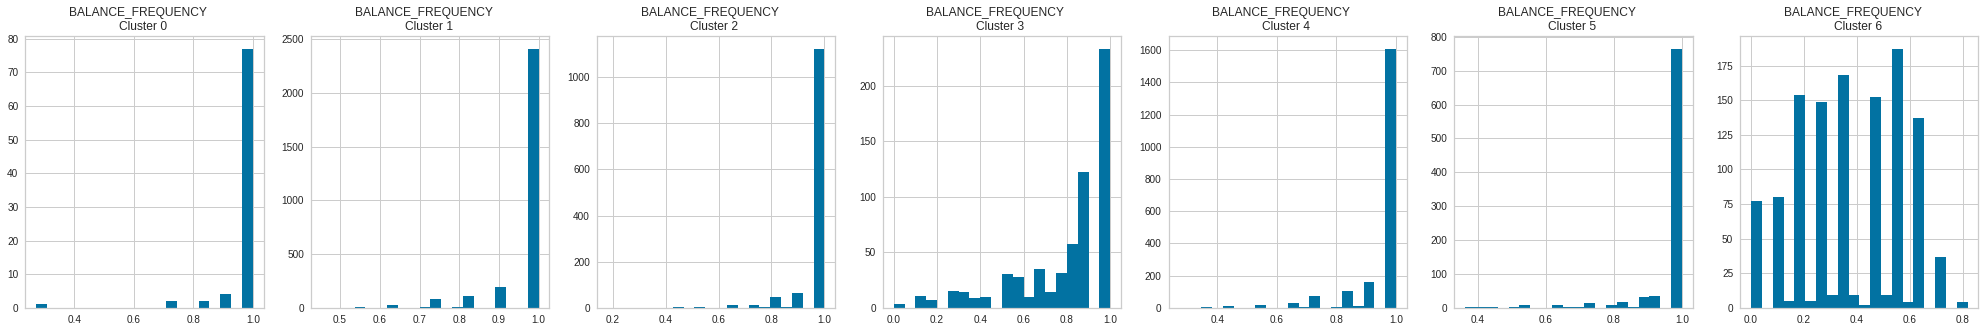

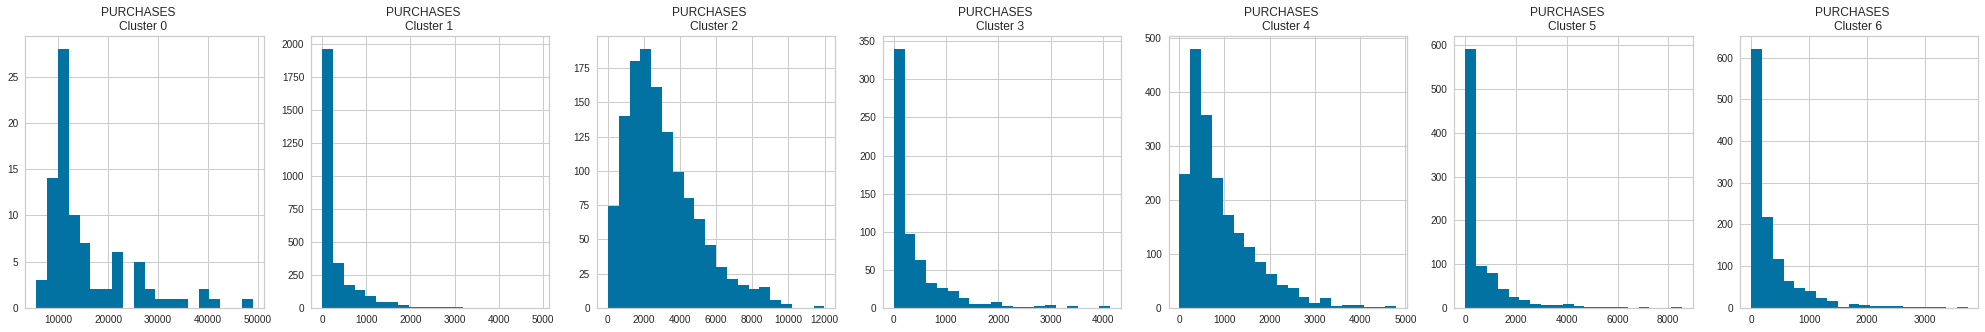

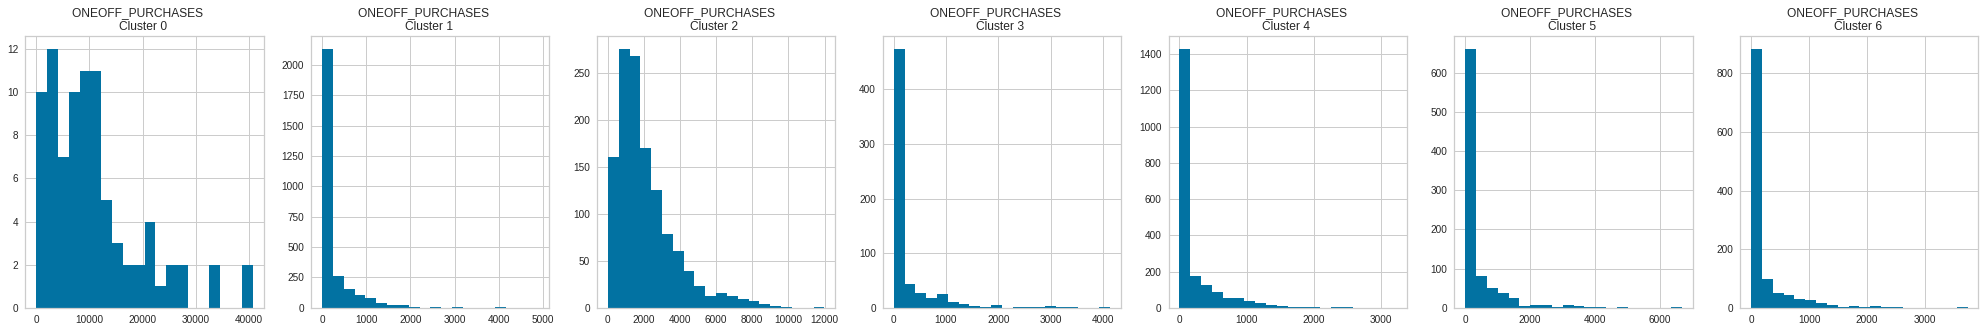

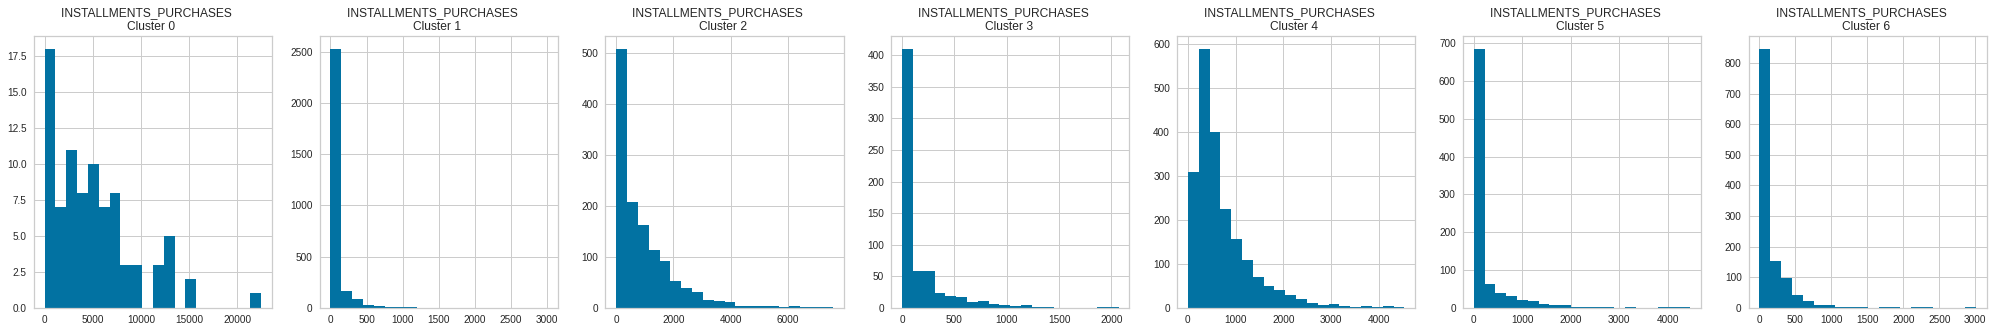

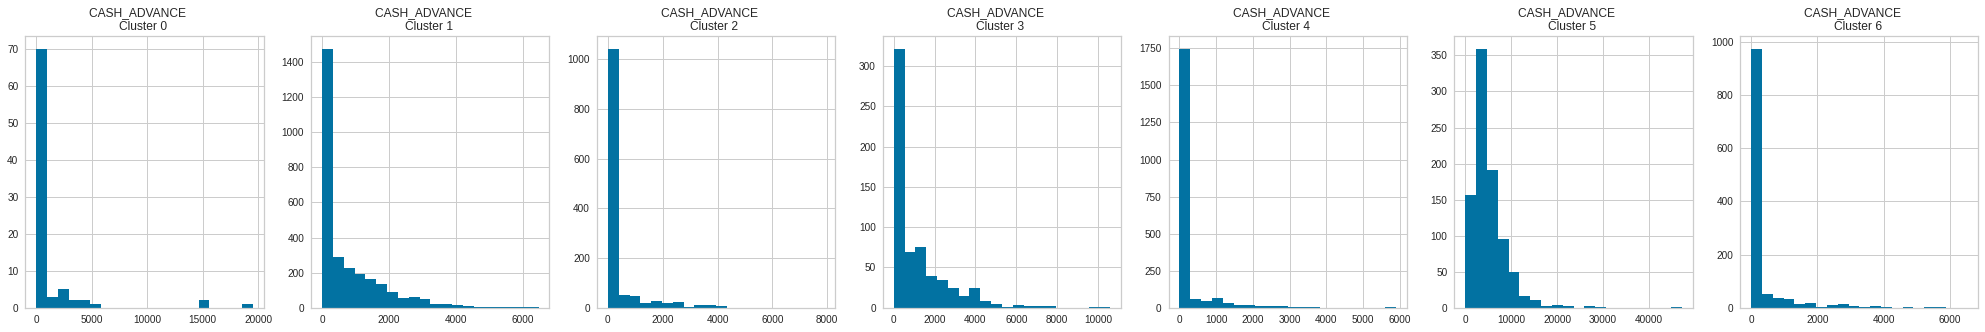

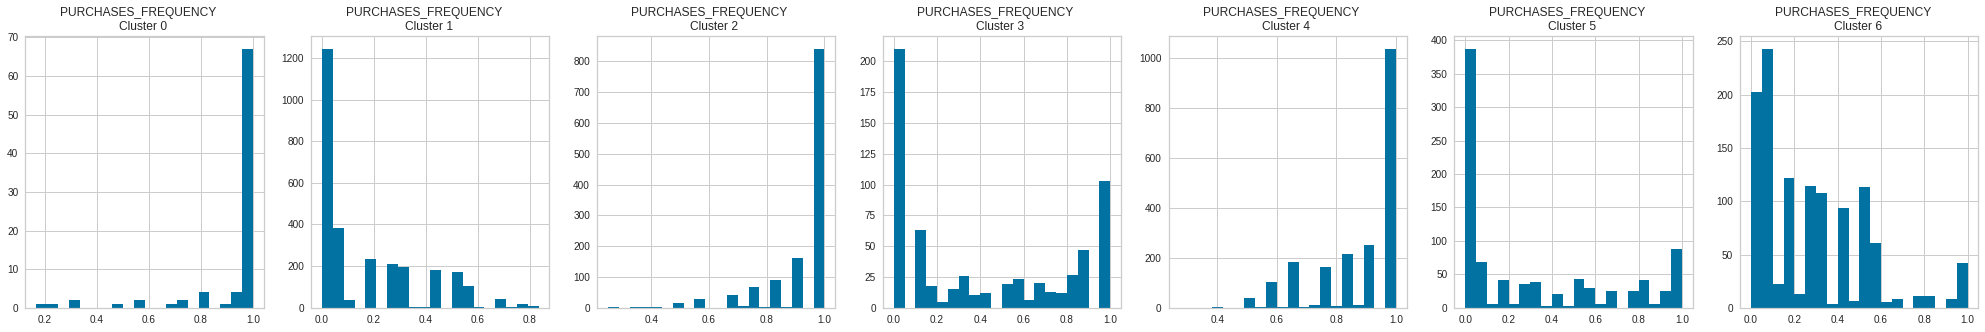

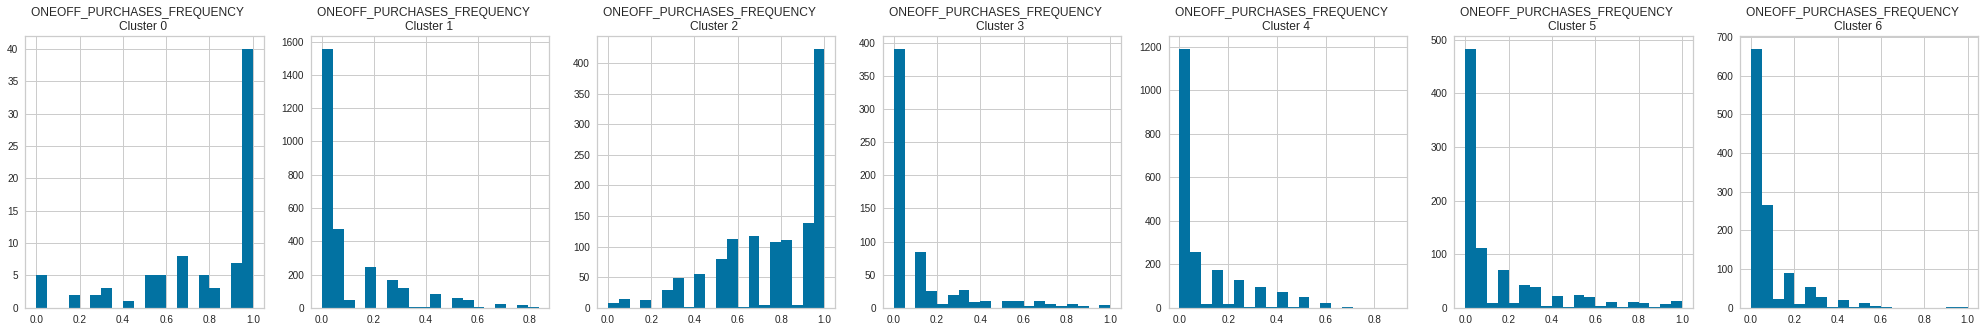

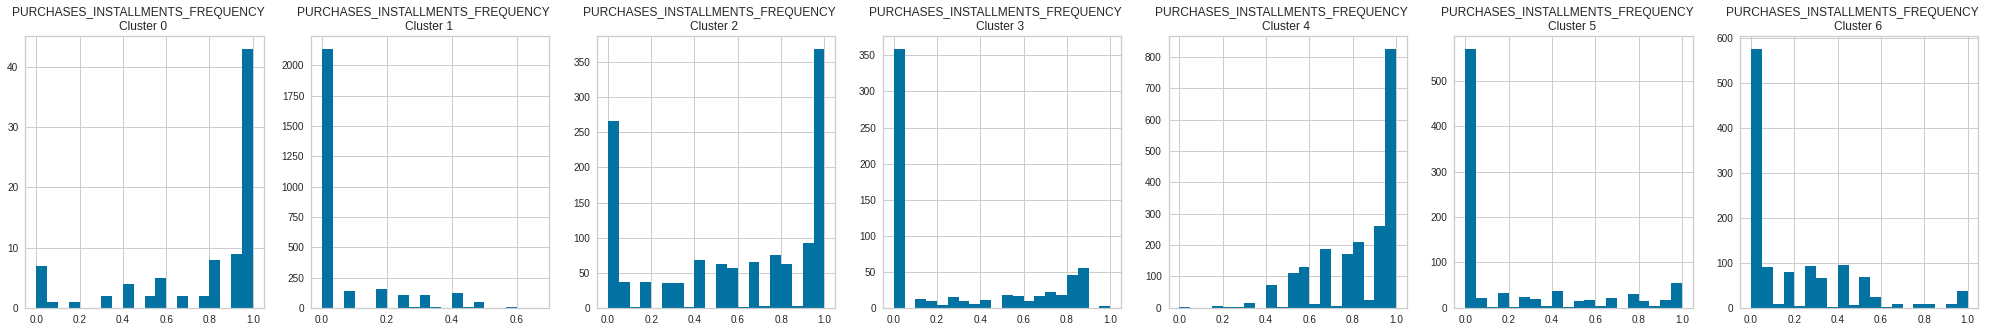

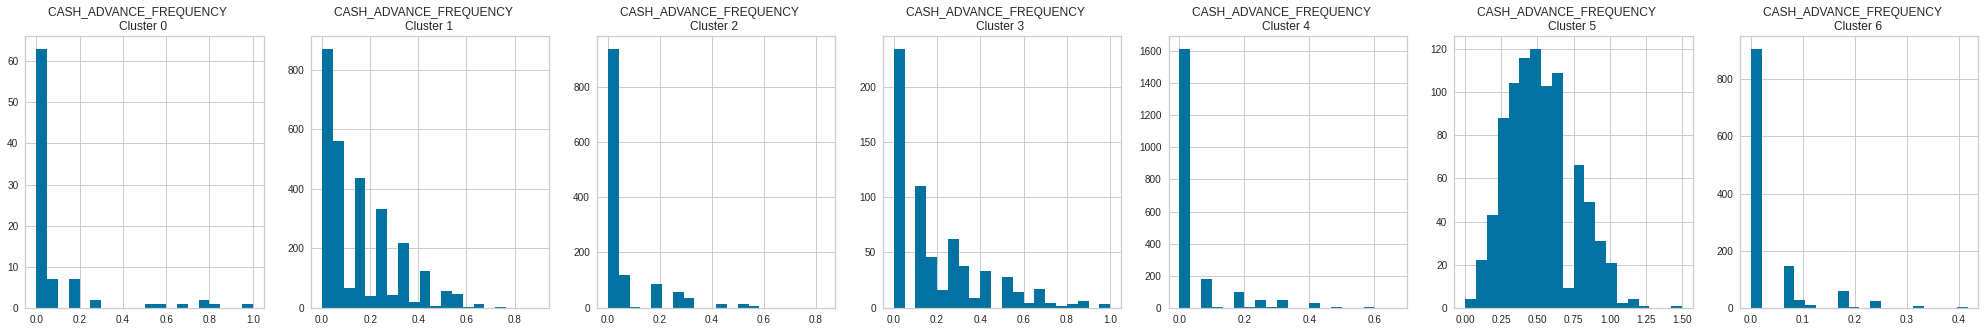

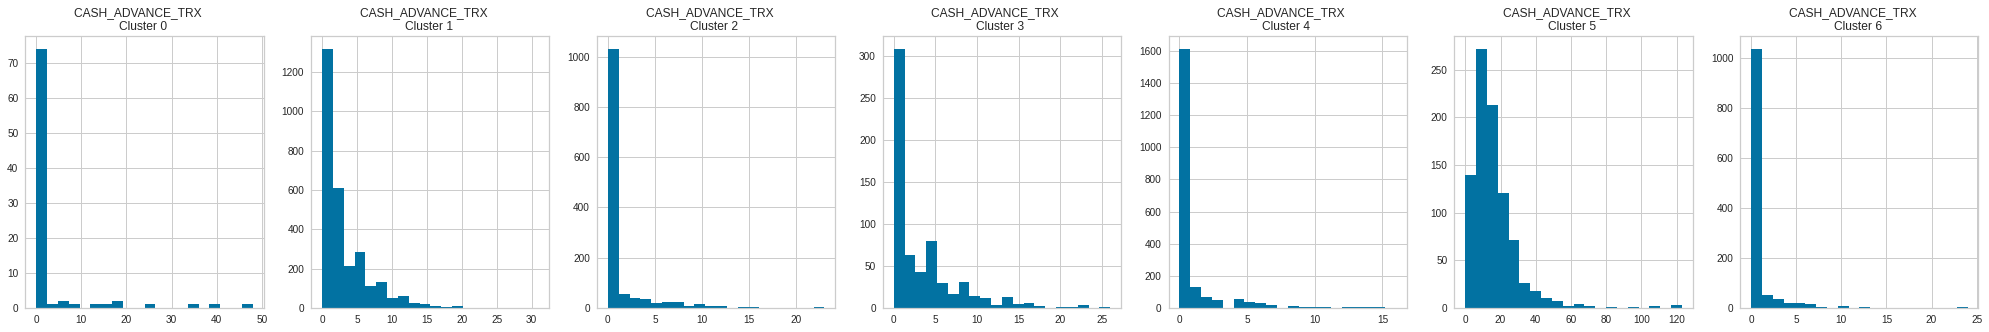

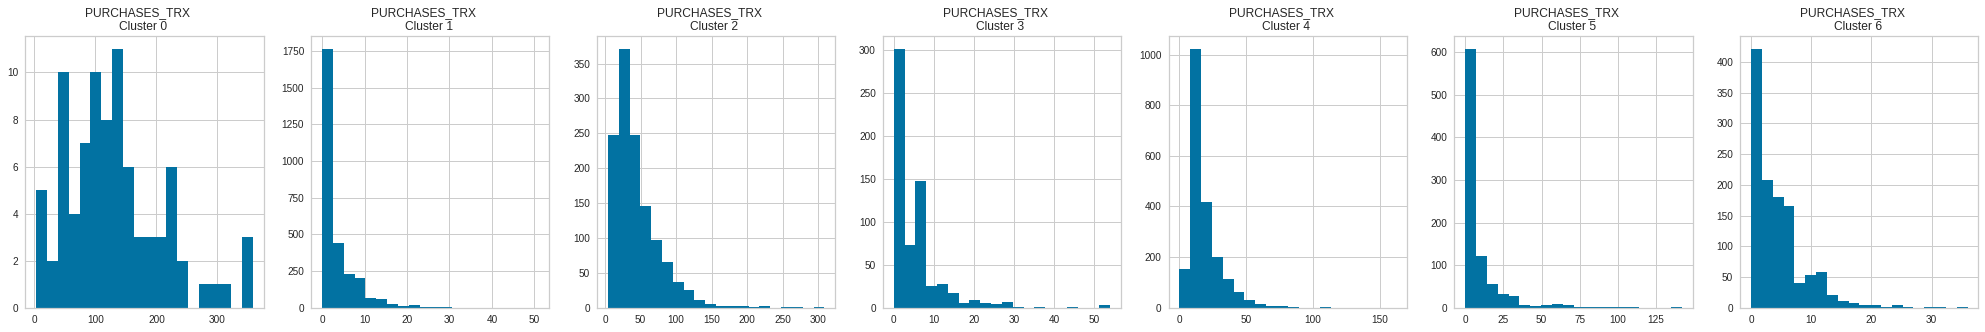

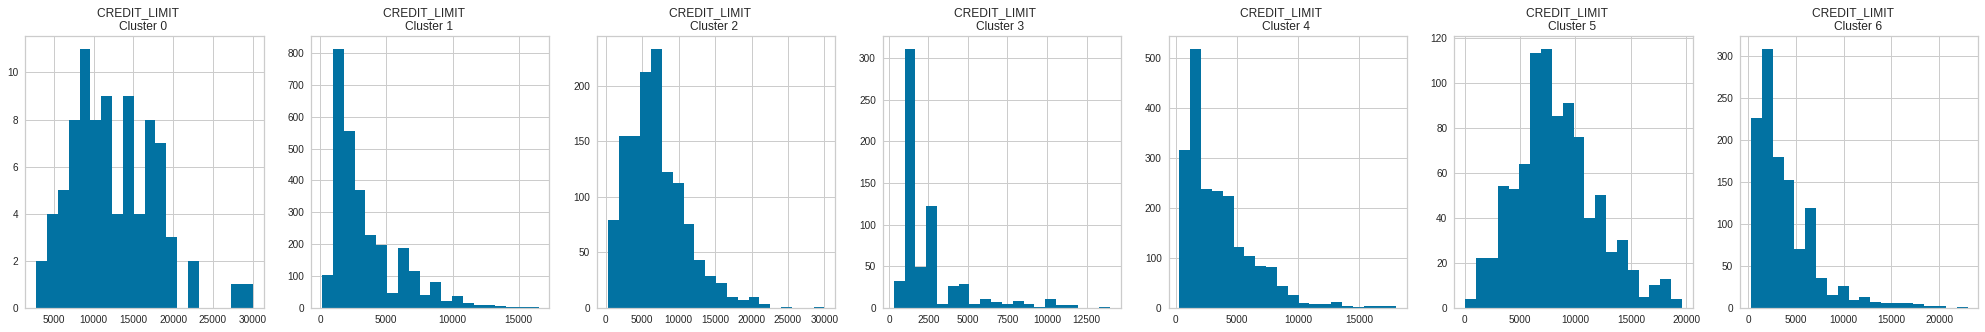

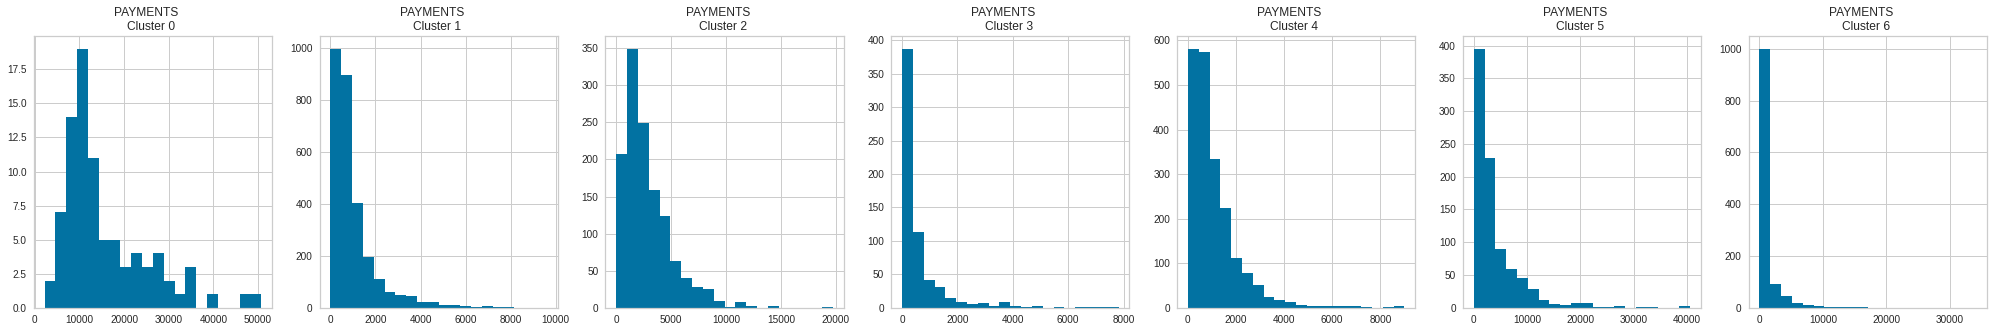

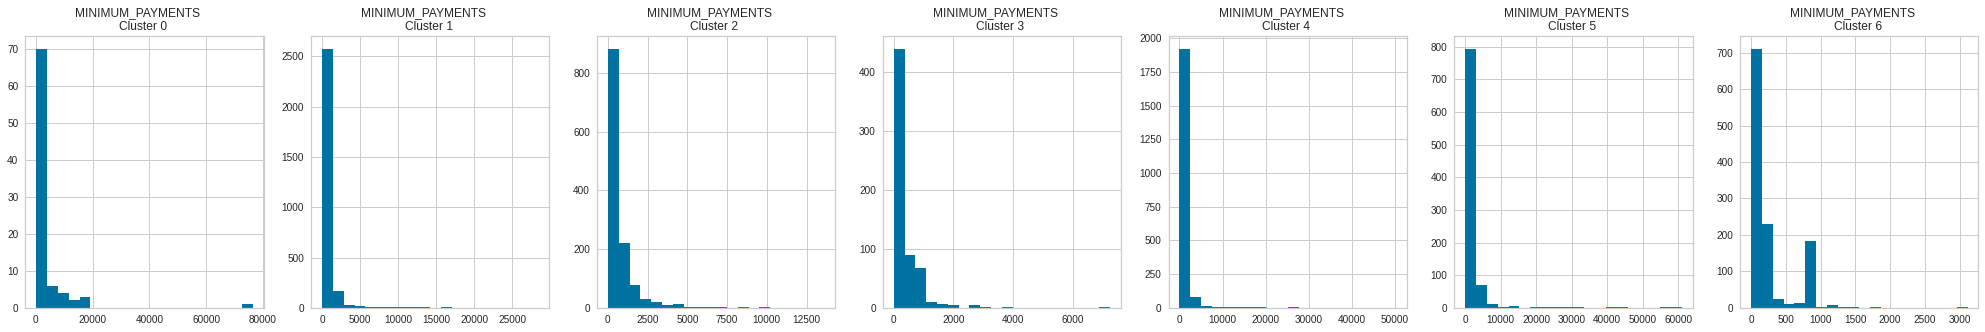

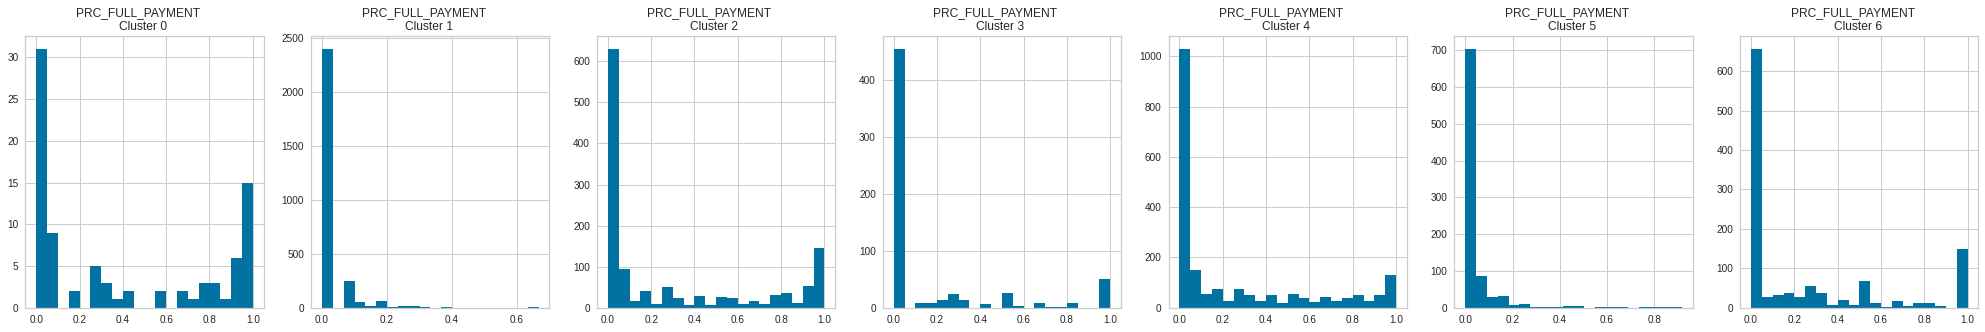

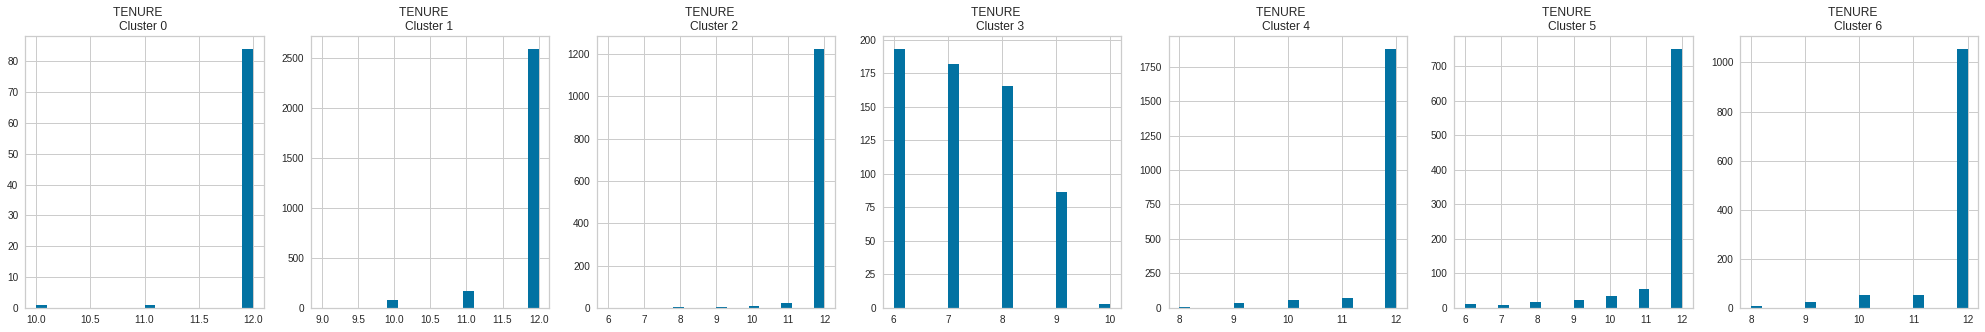

In [73]:
# Plot the histogram of various clusters
for i in df_creditcard.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_creditcard_cluster[df_creditcard_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

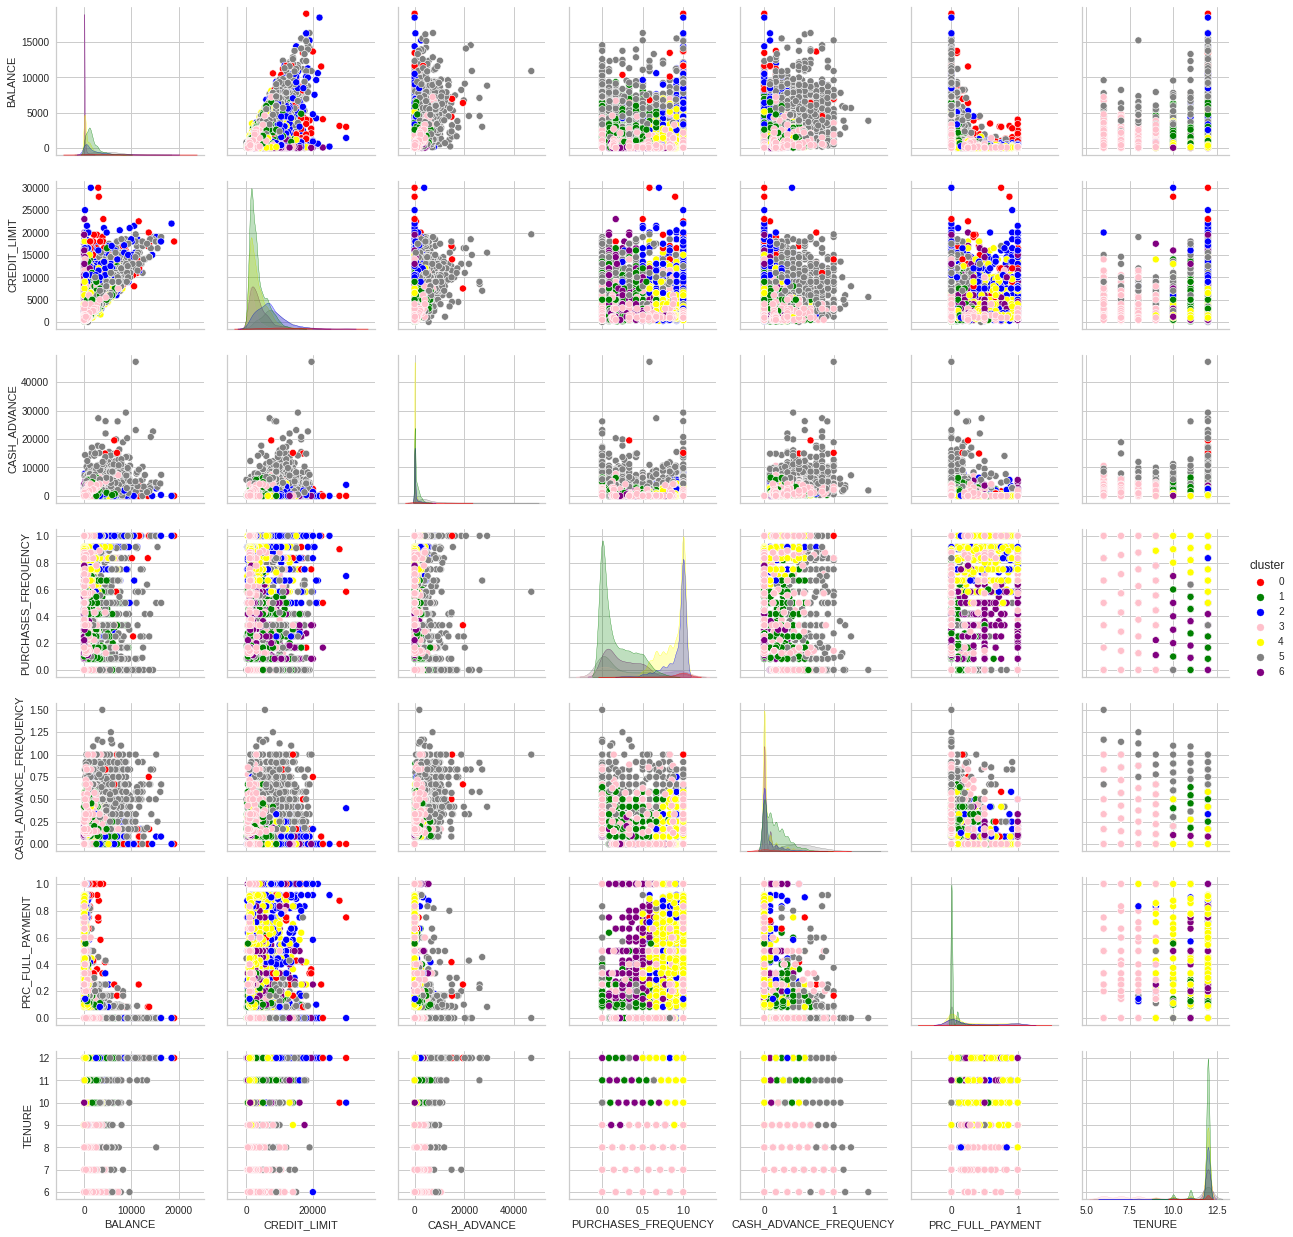

In [81]:
important_columns = ['BALANCE', 'CREDIT_LIMIT','CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster']

sns.pairplot(df_creditcard_cluster[important_columns], hue='cluster', palette=['red', 'green','blue','pink', 'yellow','gray','purple']) 

## PRINCIPAL COMPONENT ANALYSIS

In [83]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_creditcard_scaled)
principal_comp


array([[-1.68222007, -1.0764547 ],
       [-1.13828821,  2.50643295],
       [ 0.96967352, -0.38345317],
       ...,
       [-0.92620461, -1.81078281],
       [-2.33655026, -0.65797607],
       [-0.55642293, -0.40045478]])

In [84]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076455
1,-1.138288,2.506433
2,0.969674,-0.383453
3,-0.873628,0.043166
4,-1.599434,-0.688584


In [85]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076455,1
1,-1.138288,2.506433,5
2,0.969674,-0.383453,2
3,-0.873628,0.043166,1
4,-1.599434,-0.688584,1


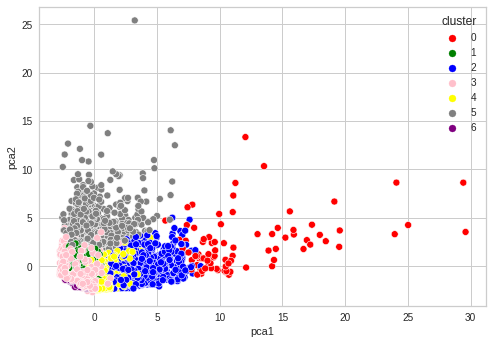

In [89]:
sns.scatterplot(x="pca1", y="pca2", data = pca_df, hue = 'cluster', palette=['red', 'green','blue','pink', 'yellow','gray','purple'])

# Autoencoder for dimensionality reduction

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [19]:
input_df = Input(shape=(17,))

x = Dense(512, activation='relu')(input_df)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)

decoded = Dense(17)(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mse')


In [20]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 512)               9216      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
 dense_4 (Dense)             (None, 128)               1408      
                                                                 
 dense_5 (Dense)             (None, 256)               33024 

In [21]:
history = autoencoder.fit(df_creditcard_scaled, df_creditcard_scaled, batch_size = 128, epochs = 50,  verbose = 1)

Epoch 1/50
70/70 [==============================] - 2s 12ms/step - loss: 0.3459
Epoch 2/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0909
Epoch 3/50
70/70 [==============================] - 1s 14ms/step - loss: 0.0544
Epoch 4/50
70/70 [==============================] - 1s 20ms/step - loss: 0.0388
Epoch 5/50
70/70 [==============================] - 1s 20ms/step - loss: 0.0358
Epoch 6/50
70/70 [==============================] - 1s 20ms/step - loss: 0.0349
Epoch 7/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0309
Epoch 8/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0246
Epoch 9/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0245
Epoch 10/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0193
Epoch 11/50
70/70 [==============================] - 1s 12ms/step - loss: 0.0180
Epoch 12/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0195
Epoch 13/50
70/70 [==================

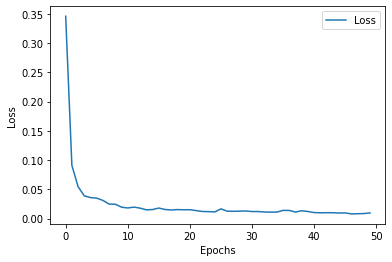

In [22]:
plt.plot(history.history['loss'],label="Loss")
# plt.plot(history.history['val_loss'],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim(0,1)
plt.legend()

In [23]:
autoencoder.save_weights('autoencoder.h5') 

In [24]:
pred = encoder.predict(df_creditcard_scaled)
pred.shape

(8950, 10)

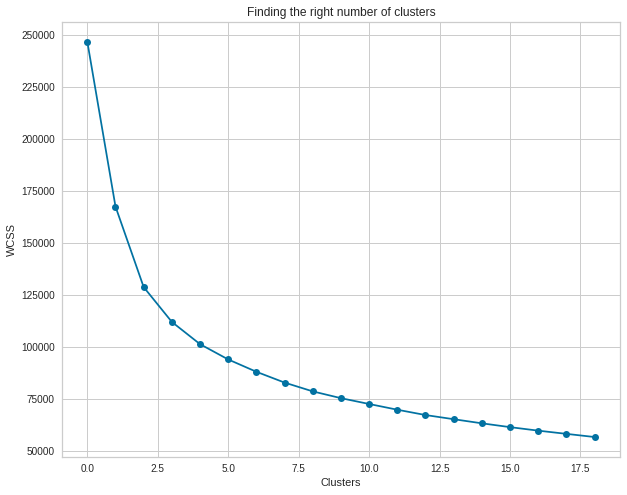

In [30]:
wcss = [KMeans(n_clusters=i).fit(pred).inertia_ for i in range(1,20)]

fig = plt.figure(figsize=(10,8))
plt.plot(wcss, 'o-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6582cd3150>,
                 estimator=KMeans(n_clusters=19), k=(1, 20))

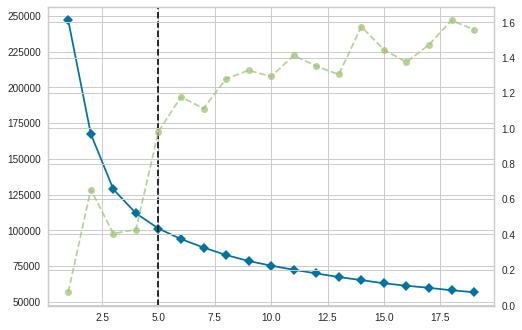

In [31]:
model = KElbowVisualizer(KMeans(),k=(1,20))
model.fit(pred)

In [32]:
kmeans = KMeans(5)
kmeans.fit(pred)
labels = kmeans.labels_
labels.max()

4

In [33]:
df_creditcard_cluster_dr = pd.concat([df_creditcard, pd.DataFrame({'cluster':labels})], axis = 1)
df_creditcard_cluster_dr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


In [34]:
print("BALANCE", df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 0]['BALANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 1]['BALANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 2]['BALANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 3]['BALANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 4]['BALANCE'].median())

print("CASH_ADVANCE", df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 0]['CASH_ADVANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 1]['CASH_ADVANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 2]['CASH_ADVANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 3]['CASH_ADVANCE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 4]['CASH_ADVANCE'].median() )

print("PRC_FULL_PAYMENT", df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 0]['PRC_FULL_PAYMENT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 1]['PRC_FULL_PAYMENT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 2]['PRC_FULL_PAYMENT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 3]['PRC_FULL_PAYMENT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 4]['PRC_FULL_PAYMENT'].median() )

print("CREDIT_LIMIT", df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 0]['CREDIT_LIMIT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 1]['CREDIT_LIMIT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 2]['CREDIT_LIMIT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 3]['CREDIT_LIMIT'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 4]['CREDIT_LIMIT'].median() )

print("TENURE", df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 0]['TENURE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 1]['TENURE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 2]['TENURE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 3]['TENURE'].median() 
, df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == 4]['TENURE'].median() )



BALANCE 854.452972 252.174753 4474.599451 3009.6184615 1950.956894
CASH_ADVANCE 0.0 0.0 0.0 0.0 2397.763368
PRC_FULL_PAYMENT 0.0 0.25 0.166667 0.0 0.0
CREDIT_LIMIT 2700.0 5000.0 13300.0 8750.0 4000.0
TENURE 12.0 12.0 12.0 12.0 11.0


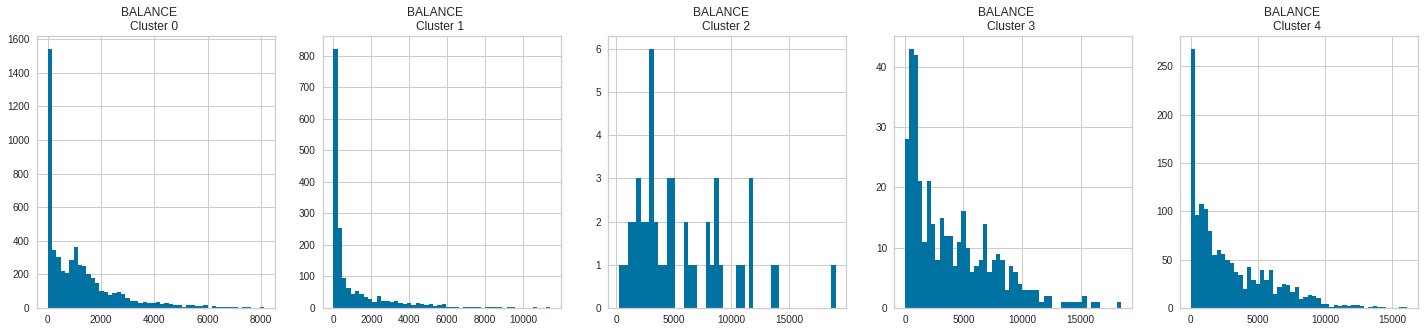

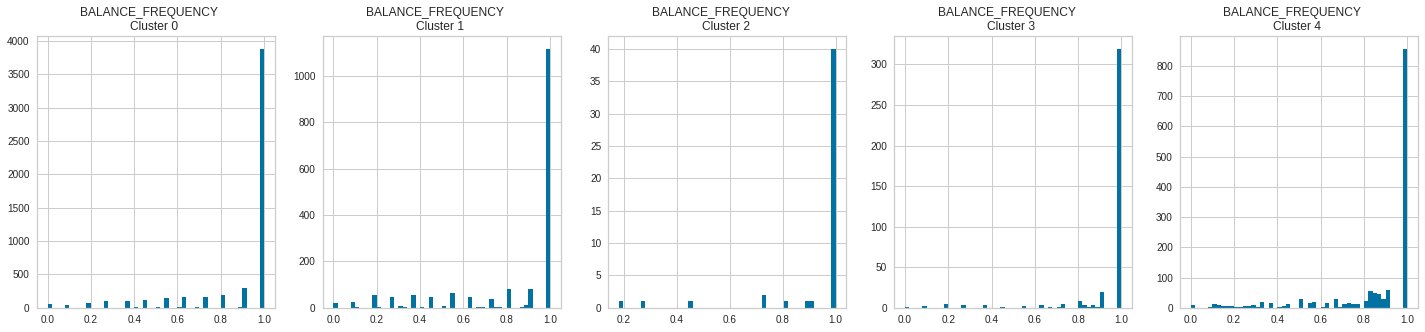

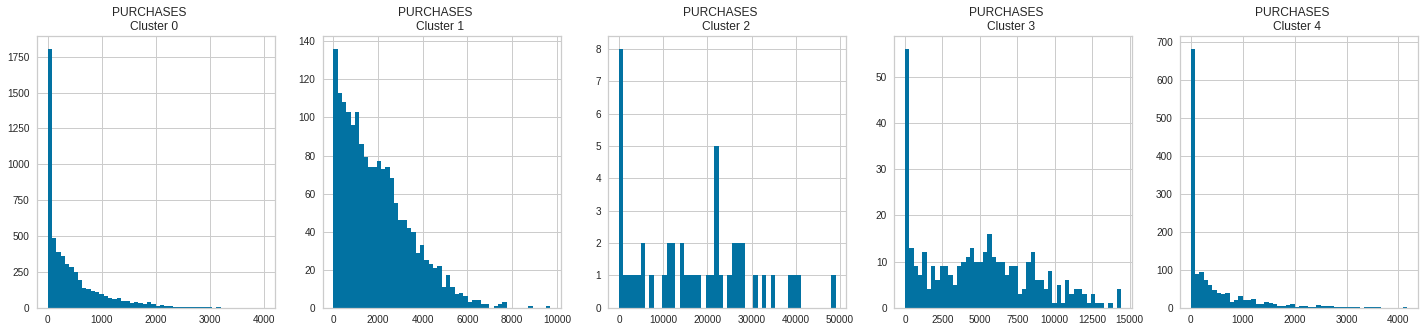

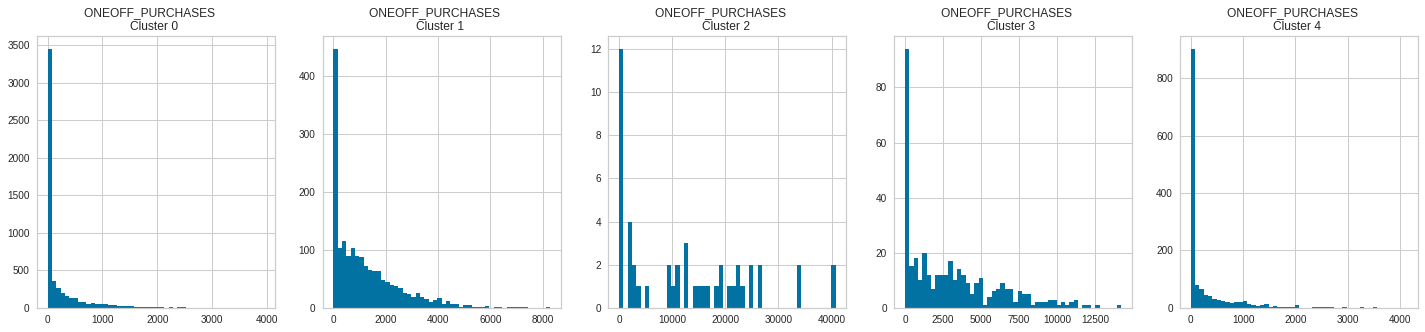

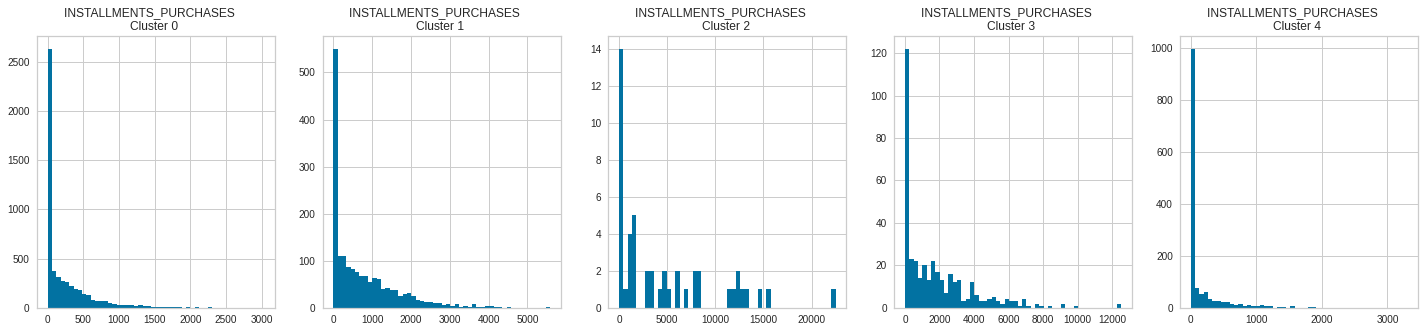

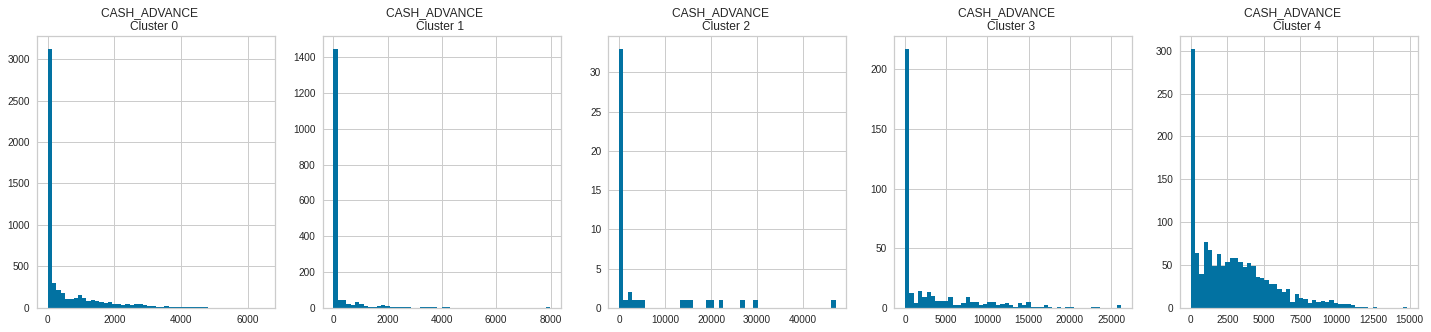

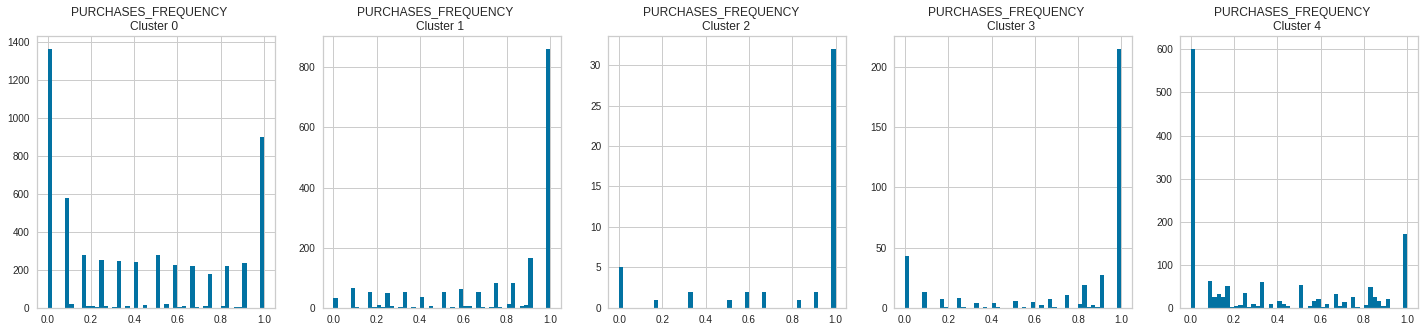

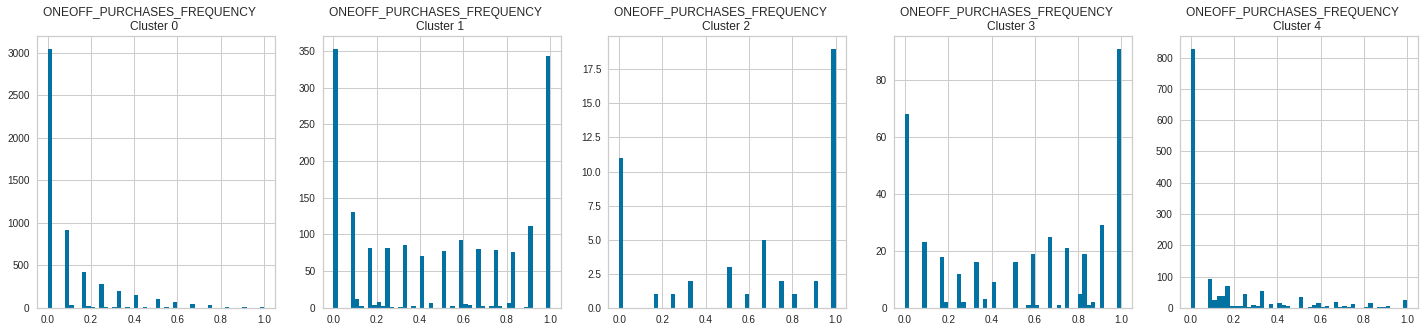

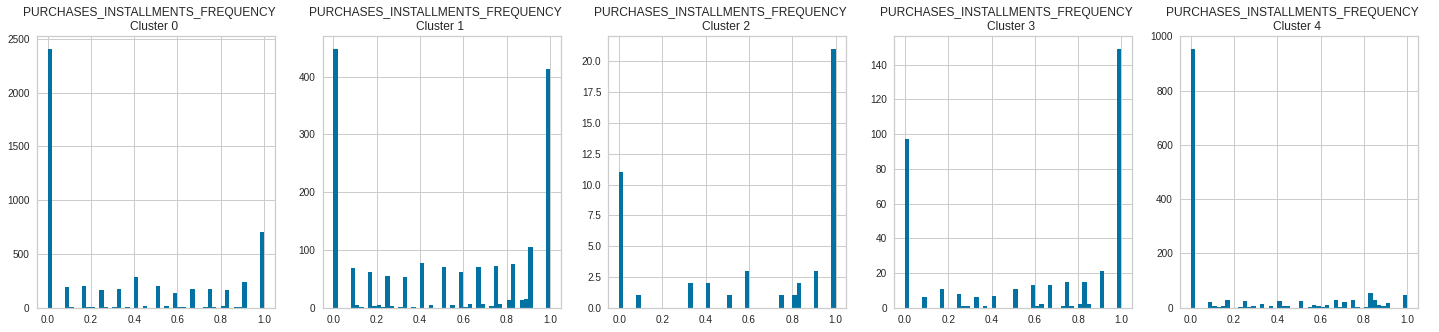

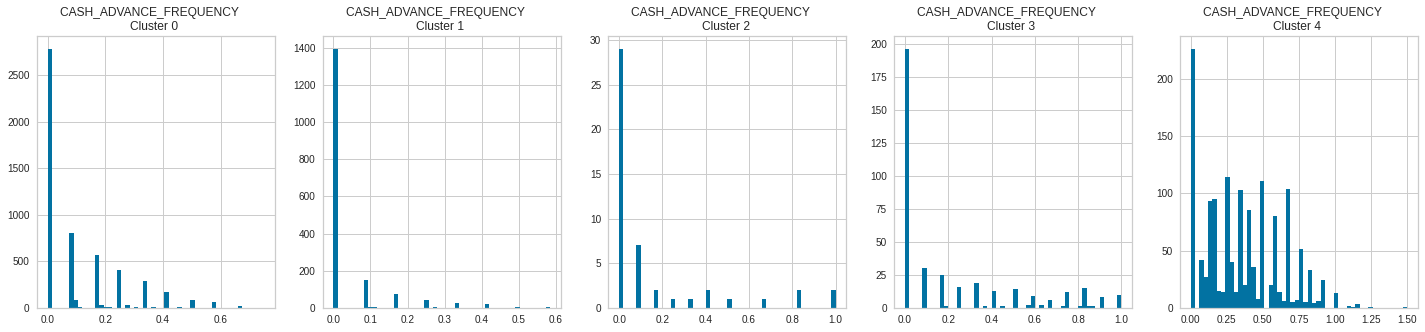

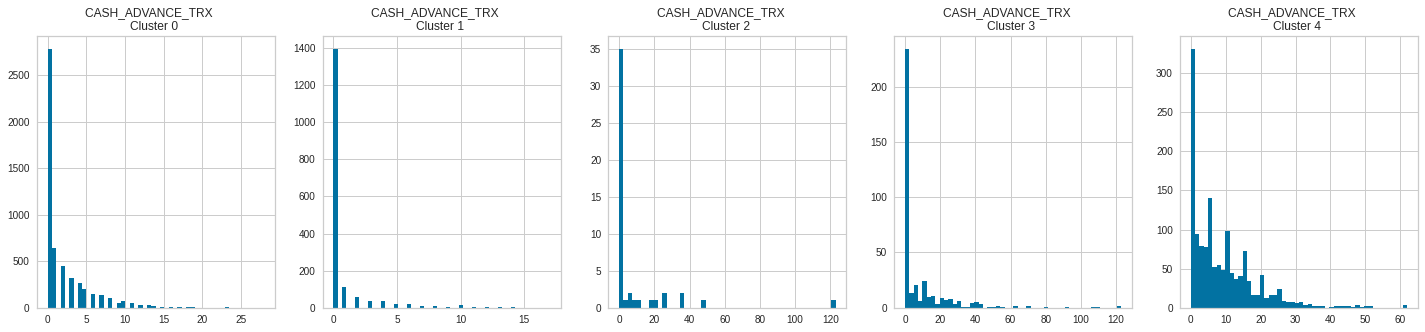

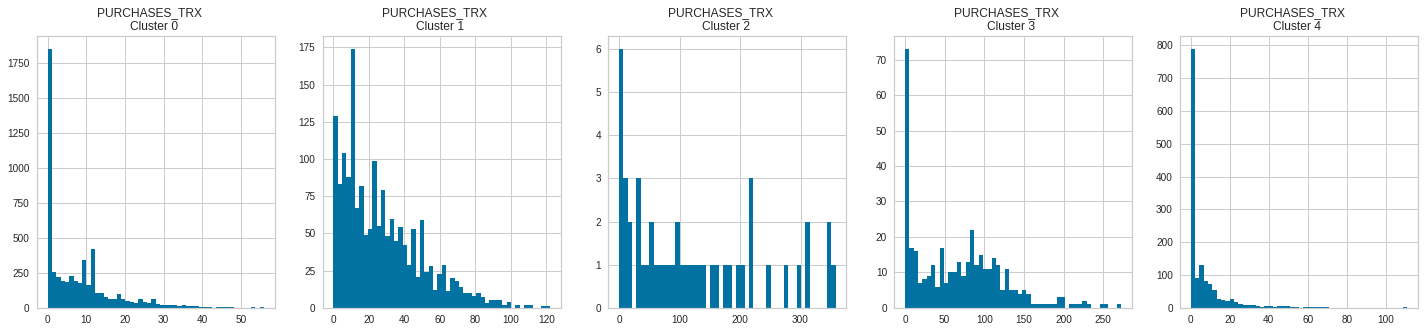

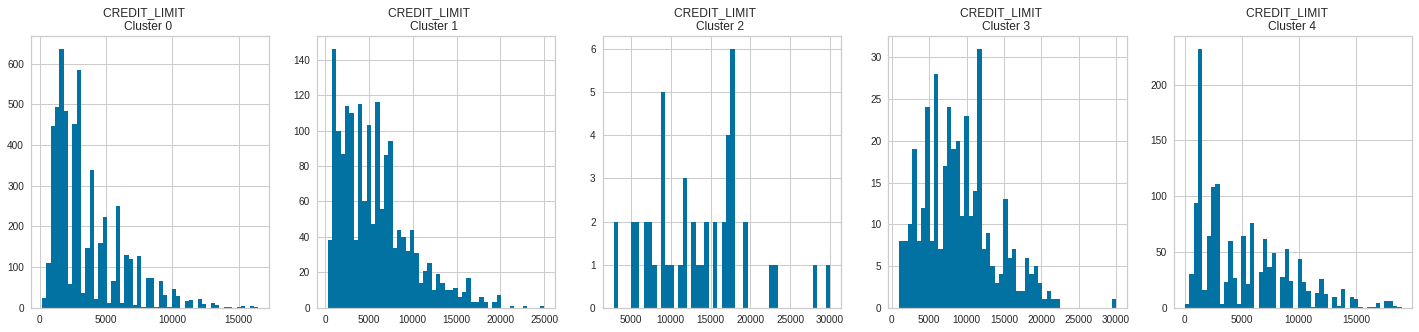

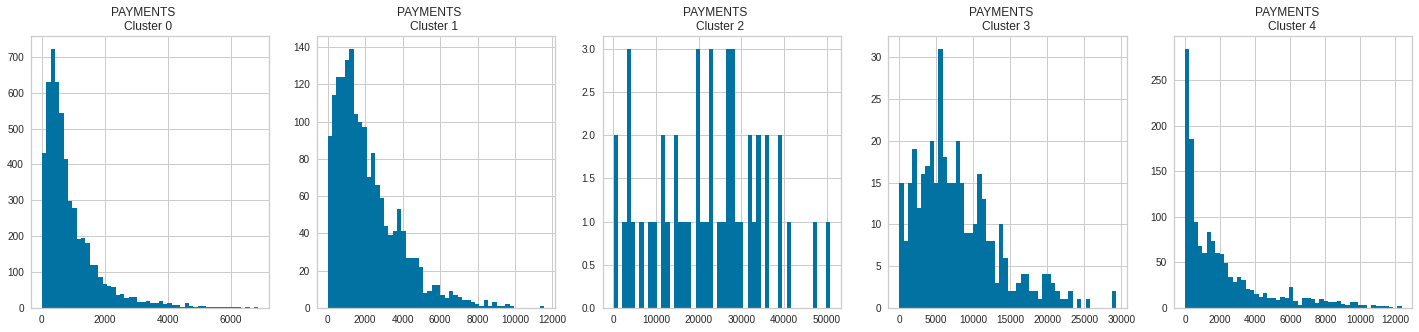

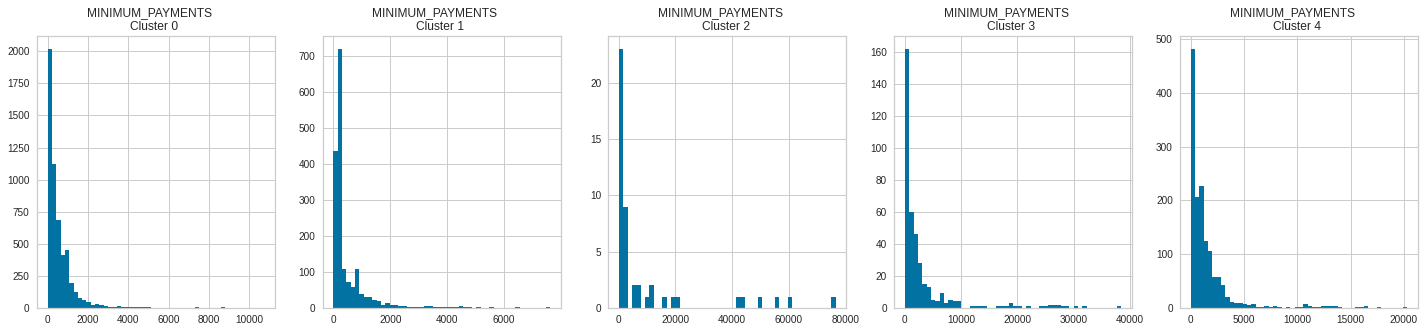

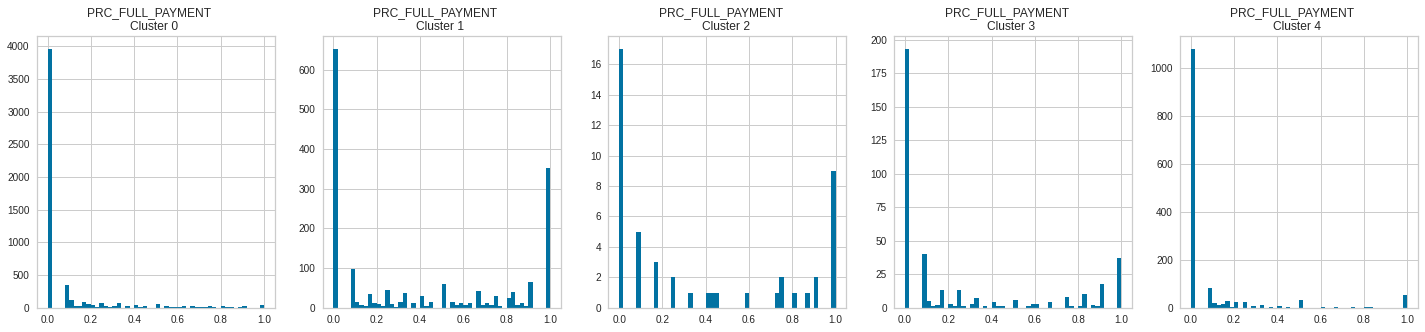

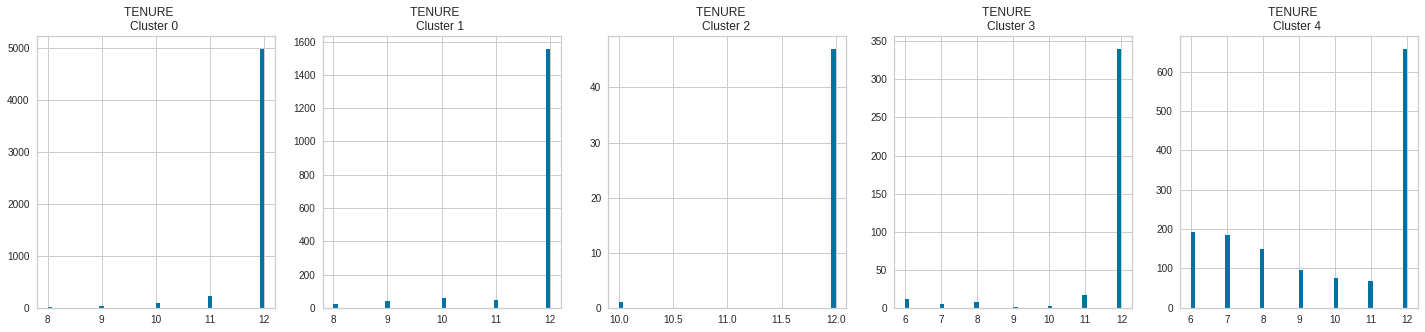

In [35]:
# Plot the histogram of various clusters
for i in df_creditcard.columns:
  plt.figure(figsize = (35, 5))
  for j in range(5):
    plt.subplot(1,7,j+1)
    cluster = df_creditcard_cluster_dr[df_creditcard_cluster_dr['cluster'] == j]
    cluster[i].hist(bins = 50)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [37]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-3.086073,-0.327784
1,0.425951,2.083361
2,-0.032295,-0.495127
3,-1.643464,-0.248450
4,-2.858903,-0.095837


In [38]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-3.086073,-0.327784,0
1,0.425951,2.083361,4
2,-0.032295,-0.495127,1
3,-1.643464,-0.248450,0
4,-2.858903,-0.095837,0


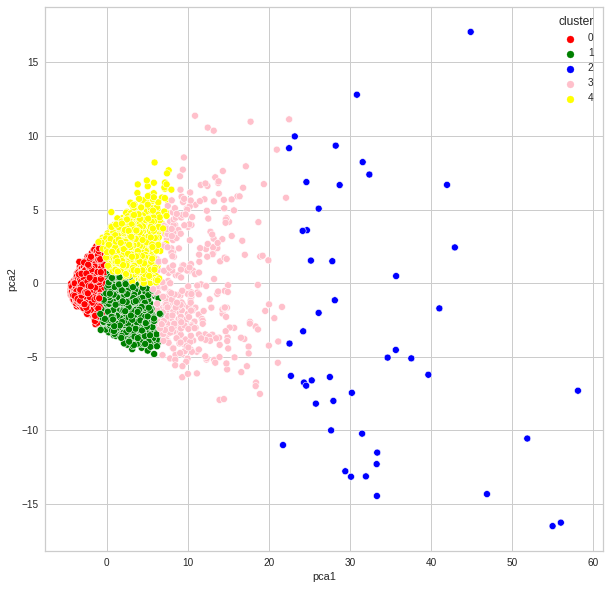

In [39]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink', 'yellow'])
plt.show()